In [1]:
import sys
sys.path.append("../../../")
DATA_PATH = "../../../data/"
SAVE_PATH = "../../../plots"

import abm_py as abm
import numpy as np
import py_common.utility as utility
from py_common.units import *


# K40 - Li6

In [2]:
a_hifi_li6 = 228.2 / 1.5 * MHZ
a_hifi_k40 = -1285.8 / 4.5 * MHZ

s_li6 = 1
i_li6 = 2
s_k40 = 1
i_k40 = 8

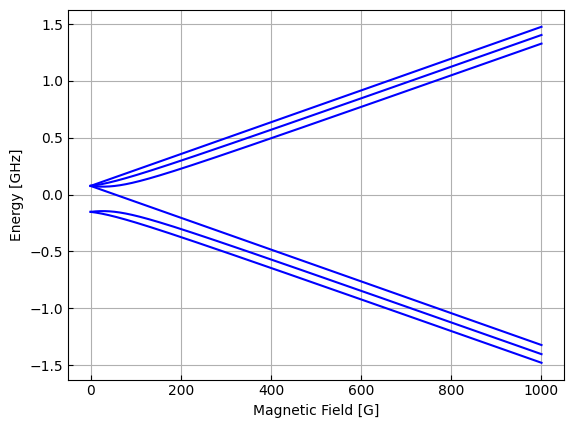

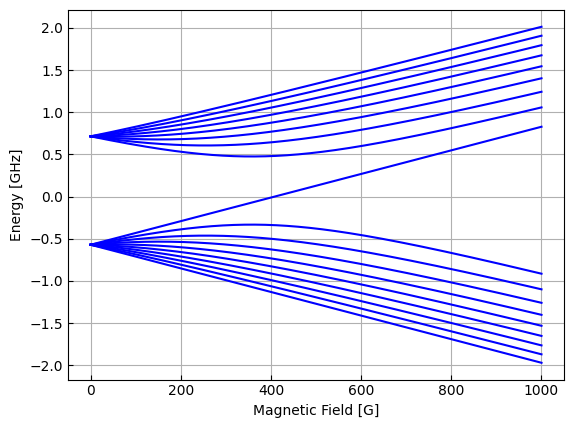

In [4]:
mag_fields_hifi = np.linspace(0, 1000, 1000)

hifi_li6 = abm.HifiProblemBuilder(s_li6, i_li6)
hifi_li6.with_hyperfine_coupling(a_hifi_li6)
energies_li6 = np.array(hifi_li6.build().states_range(mag_fields_hifi))

hifi_k40 = abm.HifiProblemBuilder(s_k40, i_k40)
hifi_k40.with_hyperfine_coupling(a_hifi_k40)
energies_k40 = np.array(hifi_k40.build().states_range(mag_fields_hifi))

fig, ax = utility.plot()
ax.set_xlabel("Magnetic Field [G]")
ax.set_ylabel("Energy [GHz]")

ax.plot(mag_fields_hifi, energies_li6 / GHZ, color="blue")

fig, ax = utility.plot()
ax.set_xlabel("Magnetic Field [G]")
ax.set_ylabel("Energy [GHz]")

ax.plot(mag_fields_hifi, energies_k40 / GHZ, color="blue");

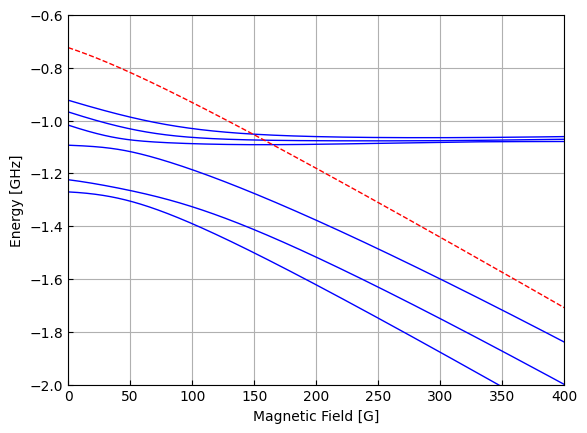

In [5]:
mag_fields_abm = np.linspace(0, 400, 1000)

triplet_states = [-427.44 * MHZ]
singlet_states = [-720.76 * MHZ]
fc_factors = [0.979]

abm_builder = abm.ABMProblemBuilder(hifi_li6, hifi_k40)
abm_builder.with_projection(-6)
abm_builder.with_vibrational(singlet_states, triplet_states, fc_factors)
energies = np.array(abm_builder.build().states_range(mag_fields_abm))

fig, ax = utility.plot()
ax.set_xlabel("Magnetic Field [G]")
ax.set_ylabel("Energy [GHz]")

ax.plot(mag_fields_abm, energies / GHZ, color="blue", linewidth = 1)
ax.set_ylim(-2.0, -0.6)
ax.set_xlim(0.0, 400.0)

ax.plot(mag_fields_hifi, energies_k40[:, 1] / GHZ + energies_li6[:, 0] / GHZ,
        color="red", linewidth = 1, linestyle = "--");

# K39 - K41

In [6]:
a_hifi_k39 = 230.8595 * MHZ
a_hifi_k41 = 127.007 * MHZ
gamma_i_k39 = 1.989344e-4 * MHZ * 1e-4
gamma_i_k41 = 1.091921e-4 * MHZ * 1e-4

s_k39 = 1
i_k39 = 3
s_k41 = 1
i_k41 = 3

hifi_k39 = abm.HifiProblemBuilder(s_k39, i_k39)
hifi_k39.with_nuclear_magneton(gamma_i_k39)
hifi_k39.with_hyperfine_coupling(a_hifi_k39)

hifi_k41 = abm.HifiProblemBuilder(s_k41, i_k41)
hifi_k41.with_nuclear_magneton(gamma_i_k41)
hifi_k41.with_hyperfine_coupling(a_hifi_k41)

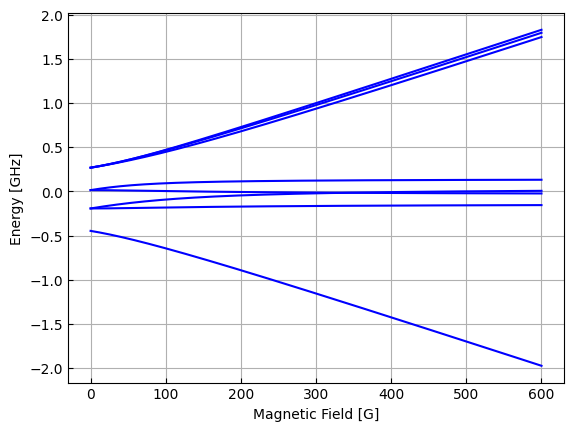

In [7]:
mag_fields = np.linspace(0, 600, 1000)

hifi = abm.DoubleHifiProblemBuilder(hifi_k39, hifi_k41)
hifi.with_projection(4)

energies_hifi = np.array(hifi.build().states_range(mag_fields))

fig, ax = utility.plot()
ax.set_xlabel("Magnetic Field [G]")
ax.set_ylabel("Energy [GHz]")

ax.plot(mag_fields, energies_hifi / GHZ, color="blue");

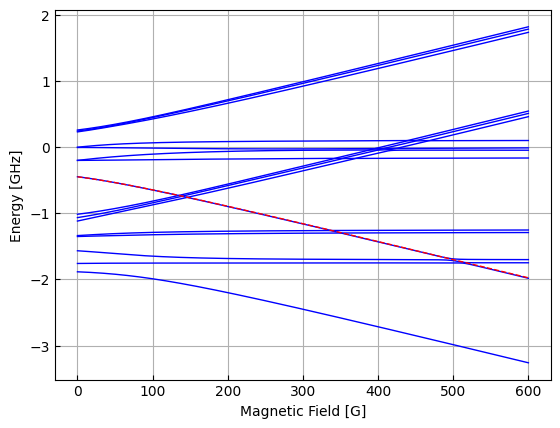

In [8]:
singlet_states = [-32.1 * MHZ, -1698.1 * MHZ]
triplet_states = [-8.33 * MHZ, -1282.5 * MHZ]
fc_factors = np.array([[0.9180, 0.0463,
                        0.0895, 0.9674]])

abm_builder = abm.ABMProblemBuilder(hifi_k39, hifi_k41)
abm_builder.with_projection(4)
abm_builder.with_vibrational(singlet_states, triplet_states, fc_factors.flatten())

energies_abm = np.array(abm_builder.build().states_range(mag_fields))

fig, ax = utility.plot()
ax.set_xlabel("Magnetic Field [G]")
ax.set_ylabel("Energy [GHz]")

ax.plot(mag_fields, energies_abm / GHZ, color="blue", linewidth = 1)
ax.plot(mag_fields, energies_hifi[:, 0] / GHZ, color="red", linewidth = 1, linestyle = "--");